### Importing libraries and data and renaming columns

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
# Define path
path = '/Users/elizabetenakamura/Documents/projects/python/data/prepared/'

In [9]:
# Import the insurance data cleaned
df= pd.read_csv(os.path.join(path, 'df_cleaned.csv'))

In [10]:
# Inspecting the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None


In [11]:
print(df.describe())

        Unnamed: 0          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


In [12]:
df.shape

(1338, 8)

In [13]:
# Drop unnamed column
df.drop(columns=['Unnamed: 0'])

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [14]:
df.head()

Unnamed: 0  age     sex     bmi  children smoker     region      charges
0           0   19  female  27.900         0    yes  southwest  16884.92400
1           1   18    male  33.770         1     no  southeast   1725.55230
2           2   28    male  33.000         3     no  southeast   4449.46200
3           3   33    male  22.705         0     no  northwest  21984.47061
4           4   32    male  28.880         0     no  northwest   3866.85520

In [15]:
# Drop unnamed column
df.drop(columns=['Unnamed: 0'])

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [16]:
# Checking for null values
print(df.isnull().sum())

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64


In [17]:
# Checking for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, age, sex, bmi, children, smoker, region, charges]
Index: []


In [18]:
df.rename(columns = {'X1 sex' : 'gender', 'charges': 'charge' }, inplace = True)

In [19]:
df

Unnamed: 0  age     sex     bmi  children smoker     region       charge
0              0   19  female  27.900         0    yes  southwest  16884.92400
1              1   18    male  33.770         1     no  southeast   1725.55230
2              2   28    male  33.000         3     no  southeast   4449.46200
3              3   33    male  22.705         0     no  northwest  21984.47061
4              4   32    male  28.880         0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970         3     no  northwest  10600.54830
1334        1334   18  female  31.920         0     no  northeast   2205.98080
1335        1335   18  female  36.850         0     no  southeast   1629.83350
1336        1336   21  female  25.800         0     no  southwest   2007.94500
1337        1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 columns]

In [21]:
df

Unnamed: 0  age     sex     bmi  children smoker     region       charge
0              0   19  female  27.900         0    yes  southwest  16884.92400
1              1   18    male  33.770         1     no  southeast   1725.55230
2              2   28    male  33.000         3     no  southeast   4449.46200
3              3   33    male  22.705         0     no  northwest  21984.47061
4              4   32    male  28.880         0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970         3     no  northwest  10600.54830
1334        1334   18  female  31.920         0     no  northeast   2205.98080
1335        1335   18  female  36.850         0     no  southeast   1629.83350
1336        1336   21  female  25.800         0     no  southwest   2007.94500
1337        1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 columns]

### The elbow technique

In [42]:
df_numeric = df[['bmi', 'age', 'charge','children']]

In [43]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [44]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-196074537157.16693,
 -48017858472.53919,
 -23046003833.62143,
 -12126162257.502382,
 -8540131634.606734,
 -6168387936.109066,
 -4435372433.140329,
 -3491459033.6327033,
 -3245481951.282383]

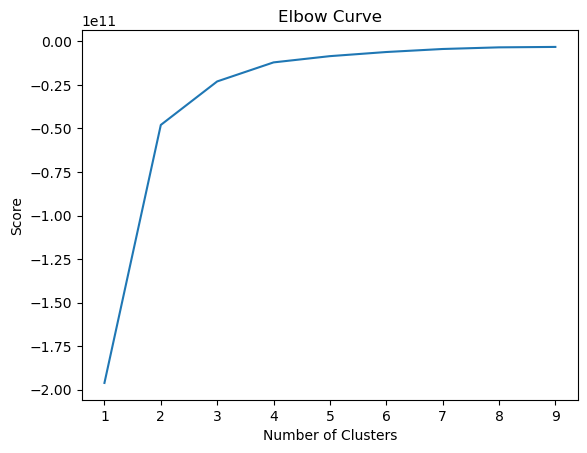

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from one to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### k-means clustering

In [55]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [56]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

KMeans(n_clusters=2)

In [65]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

/var/folders/gq/_hkfks214y925nq_01dxwdmm0000gn/T/ipykernel_18518/1738728002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['clusters'] = kmeans.fit_predict(df_numeric)


In [66]:
df_numeric.head()

bmi  age       charge  children  clusters
0  27.900   19  16884.92400         0         0
1  33.770   18   1725.55230         1         0
2  33.000   28   4449.46200         3         0
3  22.705   33  21984.47061         0         0
4  28.880   32   3866.85520         0         0

In [67]:
df_numeric['clusters'].value_counts()

clusters
0    1099
1     239
Name: count, dtype: int64

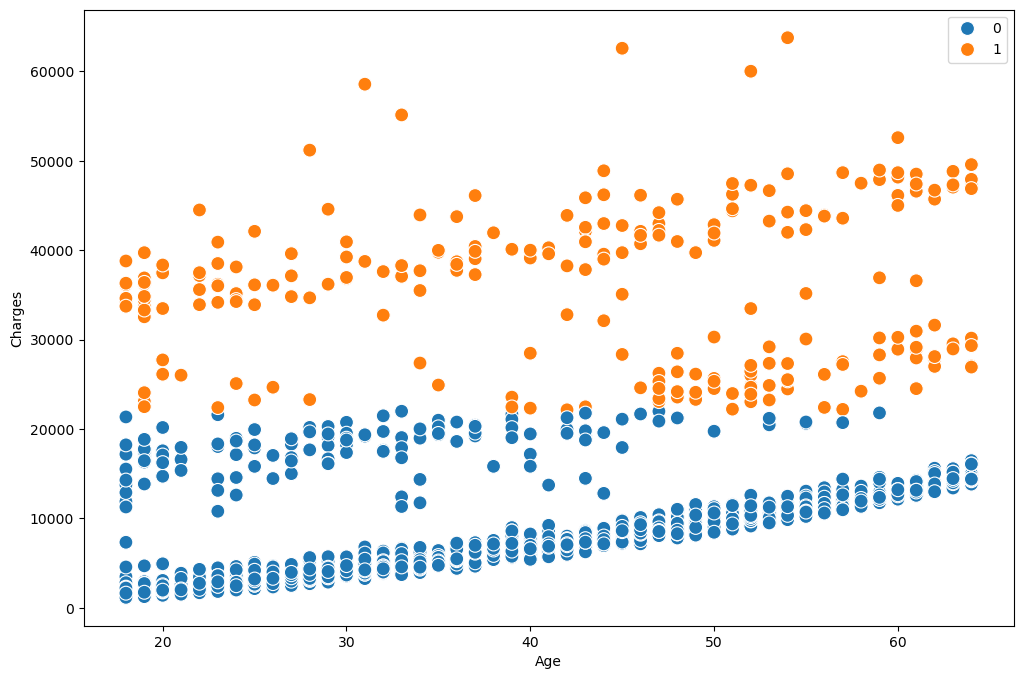

In [68]:
# Plot the clusters for the "age" and "charge" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['age'], y=df_numeric['charge'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

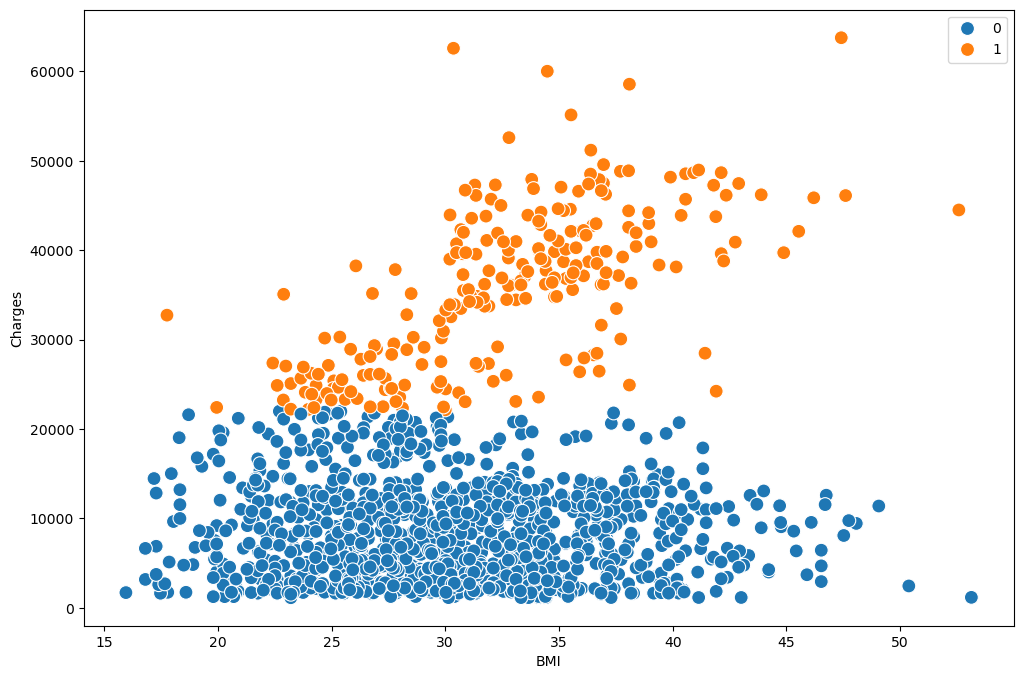

In [69]:
# Plot the clusters for the "bmi" and "charge" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['bmi'], y=df_numeric['charge'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('BMI') 
plt.ylabel('Charges') 
plt.show()

In [79]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [77]:
df_numeric.groupby('cluster').agg({'charge':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'age':['mean', 'median'],
                          })

charge                    bmi               age       
                 mean      median       mean median       mean median
cluster                                                              
pink      8364.847548   7624.6300  30.217439  29.83  38.433121   38.0
purple   35827.855796  36307.7983  32.714059  32.70  42.765690   46.0